In [18]:
import numpy as np
import matplotlib.pyplot as plt

class World(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.R = np.zeros(self.x*self.y)
        self.agentPos = 0

    def idx2xy(self,idx):
        x = int(idx / self.y)
        y = idx % self.y
        return x, y

    def xy2idx(self,x,y):
        return x*self.y + y

    def resetAgent(self, pos):
        self.agentPos = int(pos)

    def setReward(self, x, y, r):
        goalState = self.xy2idx(x, y)
        self.R[goalState] = r

    def getState(self):
        return self.agentPos

    def getReward(self):
        if self.agentPos == -1:
            return -1.0
        else:
            return self.R[self.agentPos]

    def getNumOfStates(self):
        return self.x*self.y

    def getNumOfActions(self):
        return 4

    def move(self,id):
        x_, y_ = self.idx2xy(self.agentPos)
        tmpX = x_
        tmpY = y_
        if id == 0: # move DOWN
            tmpX += 1
        elif id == 1: # move UP
            tmpX -= 1
        elif id == 2: # move RIGHT
            tmpY += 1
        elif id == 3: # move LEFT
            tmpY -= 1
        else:
            print("ERROR: Unknown action")

        if self.validMove(tmpX, tmpY):
            self.agentPos = self.xy2idx(tmpX,tmpY)

    def validMove(self,x,y):
        valid = True
        if x < 0 or x >= self.x:
            valid = False
        if y < 0 or y >= self.y:
            valid = False
        return valid


In [20]:
class Agent(object):
    def __init__(self, world):
        self.world = world
        self.numOfActions = self.world.getNumOfActions()
        self.numOfStates = self.world.getNumOfStates()
        self.Q = np.random.uniform(0.0,0.01,(self.numOfStates,self.numOfActions))
        self.alpha = 0.7
        self.gamma = 0.4
        self.epsilon = 0.25

    # epsilon-greedy action selection
    def actionSelection(self, state):
        if (np.random.rand() <= self.epsilon):
            action = np.random.randint(self.numOfActions)
        else:
            action = np.argmax(self.Q[state,:])

        return action

    def train(self, iter):
        for itr in range(iter):

            state = int(np.random.randint(0,self.numOfStates))
            self.world.resetAgent(state)

            # choose action
            a = self.actionSelection(state)
            expisode = True

            while expisode:
                # perform action
                self.world.move(a)
                # look for reward
                reward = self.world.getReward()
                state_new = int(self.world.getState())

                # new action
                a_new = self.actionSelection(state_new)

                # update Q-values
                self.Q[state,a] += self.alpha*(reward +
                                    self.gamma*self.Q[state_new,a_new]-
                                    self.Q[state,a])

                state = state_new
                a = a_new

                if reward == 1.0:
                    self.Q[state_new,:] = 0
                    expisode = False

        print(self.Q)
    
    def plotQValues(self):
        plt.rcParams.update({'font.size': 18})
        plt.imshow(self.Q, cmap='Oranges', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title("Q-values")
        plt.xlabel("Actions")
        plt.ylabel("States")
        plt.xticks(np.arange(4), ('Down', 'Up', 'Right', 'Left'))
        plt.yticks(np.arange(self.numOfStates), np.arange(self.numOfStates))
        plt.show()


[[-0.01733069 -0.00817863 -0.26400558 -0.01968705]
 [-0.94573725 -0.09110744  0.05974013 -0.00837405]
 [ 0.035029    0.04063734  0.08797247  0.00485197]
 [ 0.39316924  0.10794656  0.06115156  0.02327913]
 [ 0.05919065 -0.00754517 -0.9705487  -0.02308473]
 [ 0.15767025  0.01305725  0.05106004  0.00102416]
 [ 0.13037128  0.01989972  0.32156212 -0.9742612 ]
 [ 1.          0.10598937  0.38476667  0.06702453]
 [-0.00609831 -0.00283453  0.15997638  0.00755228]
 [ 0.1492548  -0.94134126  0.4        -0.00905771]
 [ 0.36776471  0.08608059  1.          0.07074075]
 [ 0.          0.          0.          0.        ]]


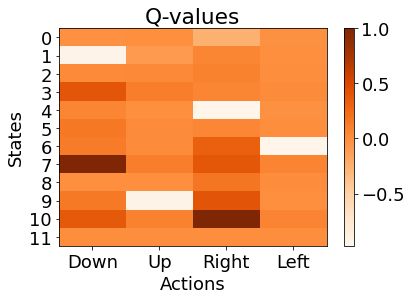

In [21]:
#Section 3.a.
world = World(3,4)

#Section 3.b.
world.setReward(2, 3, 1.0) #Goal state
world.setReward(1, 1, -1.0) #Fear region

#Section 3.c.
learner = Agent(world)

#Section 3.d.
learner.train(1000)

#Section 3.e.
learner.plotQValues()

In [24]:
aa = np.random.uniform(0.0,0.01,(3,4))
max = np.argmax(aa[0,:])
print(aa)
print(max)
print(aa[1,1:])

[[0.0019934  0.00704045 0.00060678 0.00688456]
 [0.00082835 0.009903   0.00757745 0.00791633]
 [0.00110724 0.00167273 0.00596171 0.00915084]]
1
